# 4. Bernstein-Vazirani Algorithm

#### https://www.youtube.com/watch?v=sqJIpHYl7oo&list=PLOFEBzvs-Vvp2xg9-POLJhQwtVktlYGbY&index=6

-------

In [5]:
from qiskit import * 
from qiskit.tools.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import plot_state_qsphere

%matplotlib inline

In [2]:
secretnumber = '101010101'

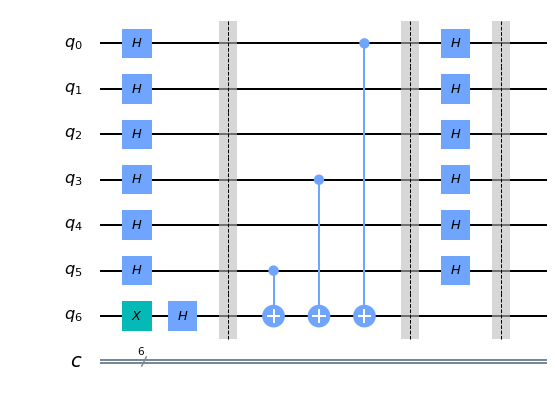

In [12]:
circut = QuantumCircuit(6+1, 6) ## A circut composed of 3 quantum bits and 3 classical bits
circut.h([0, 1, 2, 3, 4, 5])
circut.x(6)
circut.h(6)

circut.barrier() ## To enhance visualization

circut.cx(5, 6)
circut.cx(3, 6)
circut.cx(0, 6)

circut.barrier() ## To enhance visualization

circut.h([0, 1, 2, 3, 4, 5])

circut.barrier() ## To enhance visualization
circut.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5])

circut.draw(output='mpl')

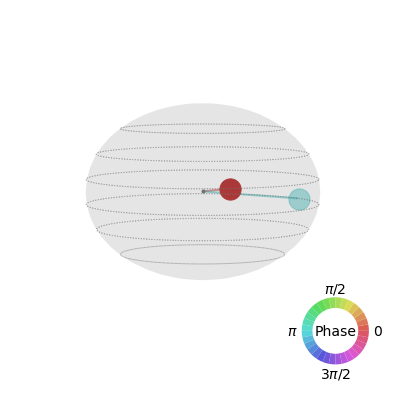

In [14]:
simulator = Aer.get_backend('statevector_simulator') ##state vector describes the quantum state of our qubit
result = execute(circut, backend = simulator, shots = 1).result()
# counts = result.get_counts()
plot_state_qsphere(result.get_statevector(circut))

# plot_histogram(counts)

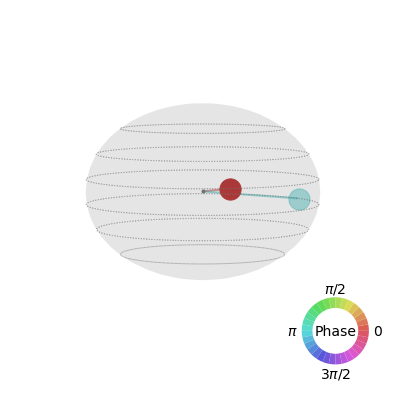

In [13]:
simulator = Aer.get_backend('statevector_simulator') ##state vector describes the quantum state of our qubit
result = execute(circut, backend = simulator, shots = 1).result()
# counts = result.get_counts()
plot_state_qsphere(result.get_statevector(circut))

# plot_histogram(counts)

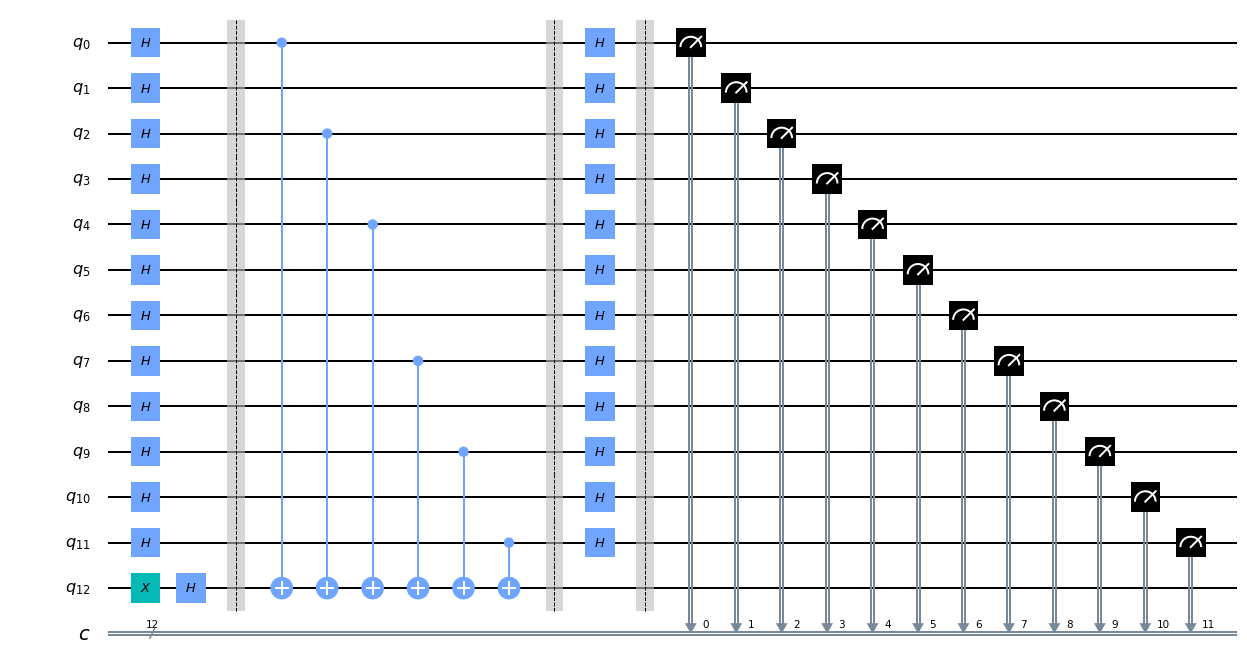

In [24]:
circut = QuantumCircuit(len(secretnumber)+1, len(secretnumber))
circut.h(range(len(secretnumber)))
circut.x(len(secretnumber))
circut.h(len(secretnumber))

circut.barrier() ## To enhance visualization

for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno =='1':
        circut.cx(ii, len(secretnumber))
        

circut.barrier() ## To enhance visualization

circut.h(range(len(secretnumber)))

circut.barrier() ## To enhance visualization
circut.measure(range(len(secretnumber)), range(len(secretnumber)))

circut.draw(output='mpl')

{'101010010101': 1}


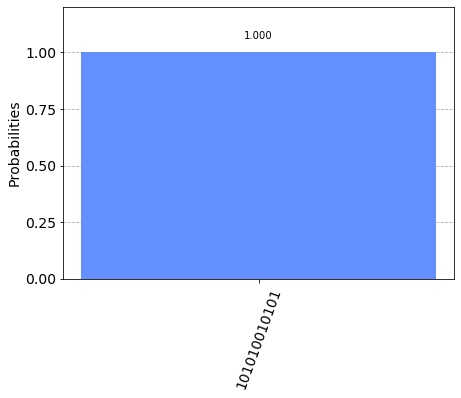

In [25]:
simulator = Aer.get_backend('qasm_simulator') 
result = execute(circut, backend = simulator, shots = 1).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)